In [60]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
random.seed(10)
import seaborn as sns

In [61]:
N = 2
param_set = np.array([2.4, 2.5, -2.9, 2.9])#np.array([0, 3.5, 0, 0])#np.array([2.4, 2.5, -2.9, 2.9, 0, 0])#np.array([2.41611213,  2.5060627 , -2.9140353 ,  2.88128345, 0, 0.])
ic = [0,0]

In [62]:
dt = 0.001
tf = 1000
t = np.arange(0, tf, dt)

In [63]:
def integrate_and_fire_coup(tf, dt, E_L):
    
    ## PARAMETERS ##
    tau = 0.01 # s (seconds)
    V_rest = -65 # mV 
    V_th = -50 # mV
    R_m = 10 # MOhm
    t_refract = 0.008 # s (seconds)

    ## TIME ##
    t = np.arange(0, tf, dt)

    ## VECTORS ##
    ii = [0]*90000 + [4]*20000 + [0]*90000 
    #ii = list(np.random.uniform(0, 2.2, 90000)) + list(np.random.uniform(2.5, 3, 20000)) + list(np.random.uniform(0, 2.2, 90000))
    I_e = ii*5 #np.random.uniform(-5, 10, len(t)) # input current
    #ii = [1]*31667 + [3]*20000 + [1]*31667
    #I_e = ii*12
    #I_e = I_e[0:-8]
    V = np.zeros(len(t)) # we create a vector of zeros for the storage of membrane potentials along time
    V[0] = V_rest # seting the initial value for membrane potential

    ## ALGORITHM V ##
    i = 1 # set initial value of the index that we will use for the while loop
    spike = 0 # start counting the number of spikes
    while i<len(t): # while our index does not exceed the the length of our vectors/ time
        V[i] = 1/tau*(E_L[i-1] - V[i-1] + R_m*I_e[i])*dt + V[i-1] # fill V[i] with the value for membrane potential yield by the LIF model equation
        if V[i]>V_th and i<(len(t)-3): # if such a value (V[i]) beats the threshold value V_th and we have enough space for a spike in our vector
                                       # we consider that the neuron spikes and, therefore, we glue an action potential
            spike = spike + 1 # add 1 to the spike count
            
            # DEPOLARIZATION
            V[i] = 40 # change the V[i] value to the depolarizaed value that characterizes the spike
            i = i+1 # increment our time index
            
            # HYPERPOLARIZATION
            V[i] = V_rest - 10 # set the next V[i] to the hyperpolarized value that characterizes spikes after depolarization
            i = i+1 # increment our time index
            
            # REFRACTORINESS
            new_i = i + int(t_refract/dt) # select our final index for refractoriness (the neuron will be in its refractory period from i to new_i)
            V[i:new_i] = V_rest # set V_rest as the value of the neuron's membrane potential for the whole refractory period
            i = new_i - 1 # update our time index to the time in which V was last filled
    
        i = i+1 # increase the time index by one and turn back to check while condition

    ## ALGORITHM V2 ## we want to compute our V_raw to be able to represent it in a plot
    V_raw = np.zeros(len(t)) 
    V_raw[0] = V_rest
    for i in range(1,len(t)):
        V_raw[i] = 1/tau*(E_L[i-1] - V_raw[i-1] + R_m*I_e[i])*dt + V_raw[i-1]
    print(spike)
    return (V, V_raw, t, I_e) 

In [64]:
E_L = -65
E_L_vec = np.ones(len(t))*E_L
V, V_raw, t, I_e = integrate_and_fire_coup(tf, dt, E_L_vec)

7145


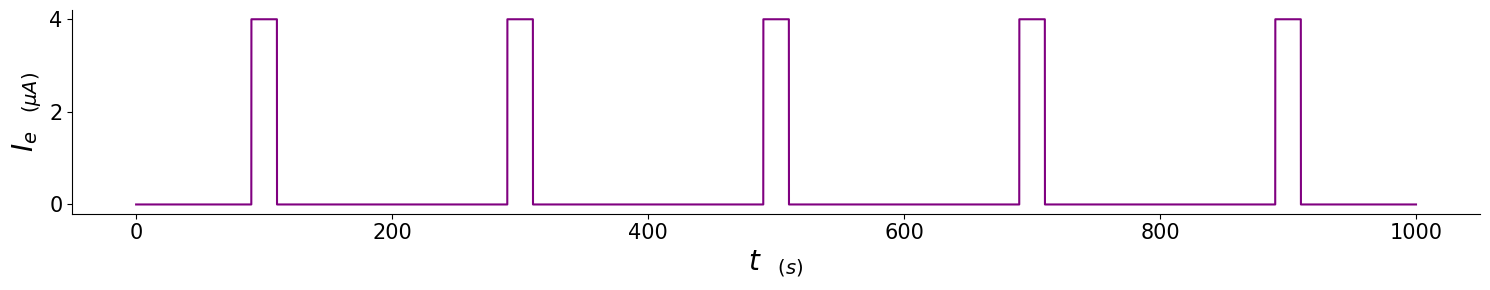

In [65]:
fig, axs = plt.subplots(1, 1, figsize = (15,3))
#fig.suptitle('Horizontally stacked subplots')
#axs.plot(t, I_e, linewidth = 1.5, c='purple')

sns.lineplot(x=t, y=I_e, ax=axs, c = 'purple')
sns.despine(ax=axs)
axs.set_ylabel('$I_{e \quad (\mu A)}$', fontsize = 20)
axs.set_xlabel('$t_{\quad (s)}$', fontsize = 20)
axs.tick_params(axis='x', labelsize=15)
axs.tick_params(axis='y', labelsize=15)

plt.tight_layout()

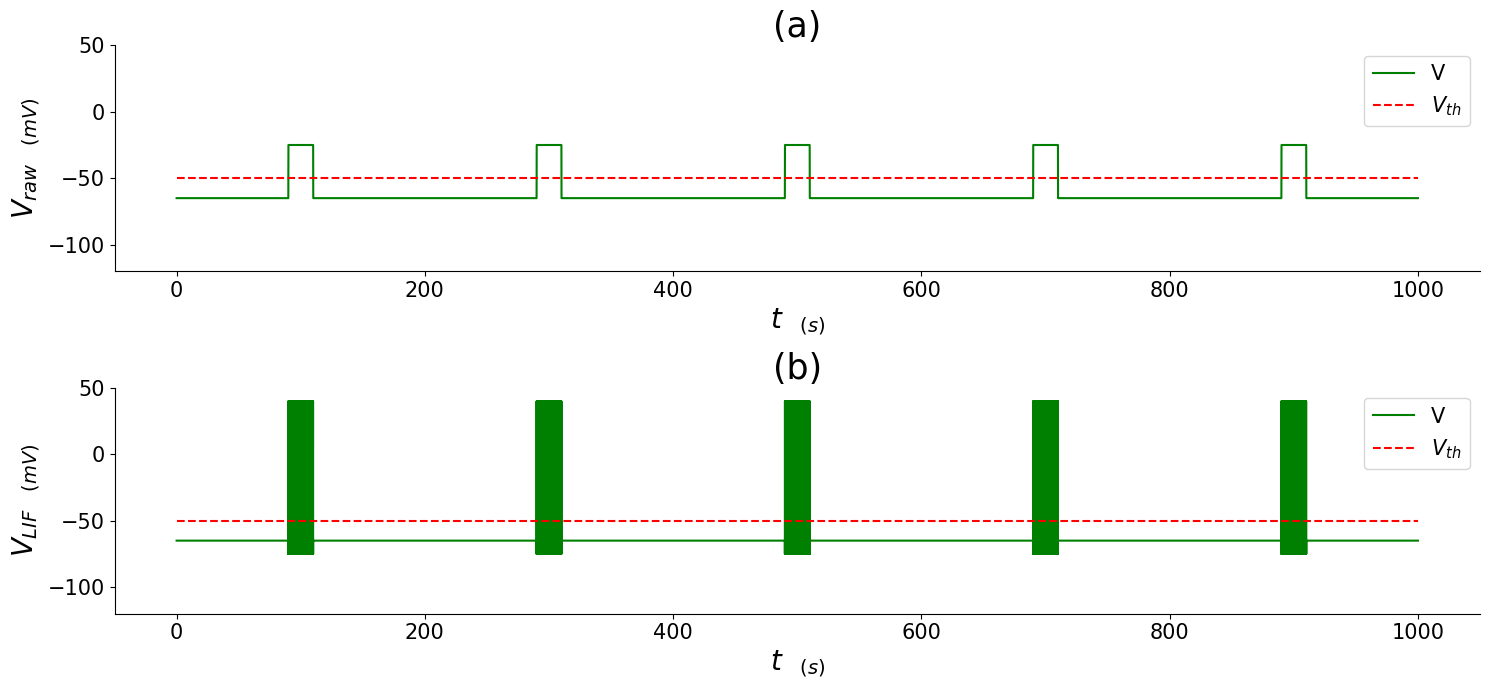

In [66]:
fig, axs = plt.subplots(2, 1, figsize = (15,7))
#fig.suptitle('Horizontally stacked subplots')

sns.lineplot(x=t, y=V_raw, ax=axs[0], label='V', c = 'green')
#sns.lineplot(x=t_neur[:-100], y=V_th_spikes[:-100], ax=ax5, label='$V_{th}$', c = 'red')
sns.despine(ax=axs[0])
#axs[0].plot(t, V_raw, c ='mediumseagreen', linewidth = 1.5, label = '$V_{raw}$')
axs[0].hlines(-50, 0, len(t)*dt, color='red', linestyle='dashed', label = '$V_{th}$')
axs[0].set_ylim(-120, 50)
axs[0].set_ylabel('$V_{raw \quad (mV)}$', fontsize = 20)
axs[0].legend(loc='upper right', fontsize = 15)

sns.lineplot(x=t, y=V, ax=axs[1], label='V', c = 'green')
sns.despine(ax=axs[1])
#axs[1].plot(t, V, linewidth = 1.5, c = 'mediumseagreen', label = '$V_{LIF}$')
axs[1].hlines(-50, 0, len(t)*dt, color='red', linestyle='dashed', label = '$V_{th}$')
axs[1].set_ylim(-120, 50)
axs[1].set_ylabel('$V_{LIF \quad (mV)}$', fontsize = 20)
axs[1].legend(loc='upper right', fontsize = 15)
titles = ['(a)', '(b)', '(c)']
abc=0
for ax in axs.flat:
    ax.set_xlabel('$t_{\quad (s)}$', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_title(titles[abc], fontsize = 25)
    abc = abc+1
plt.tight_layout()

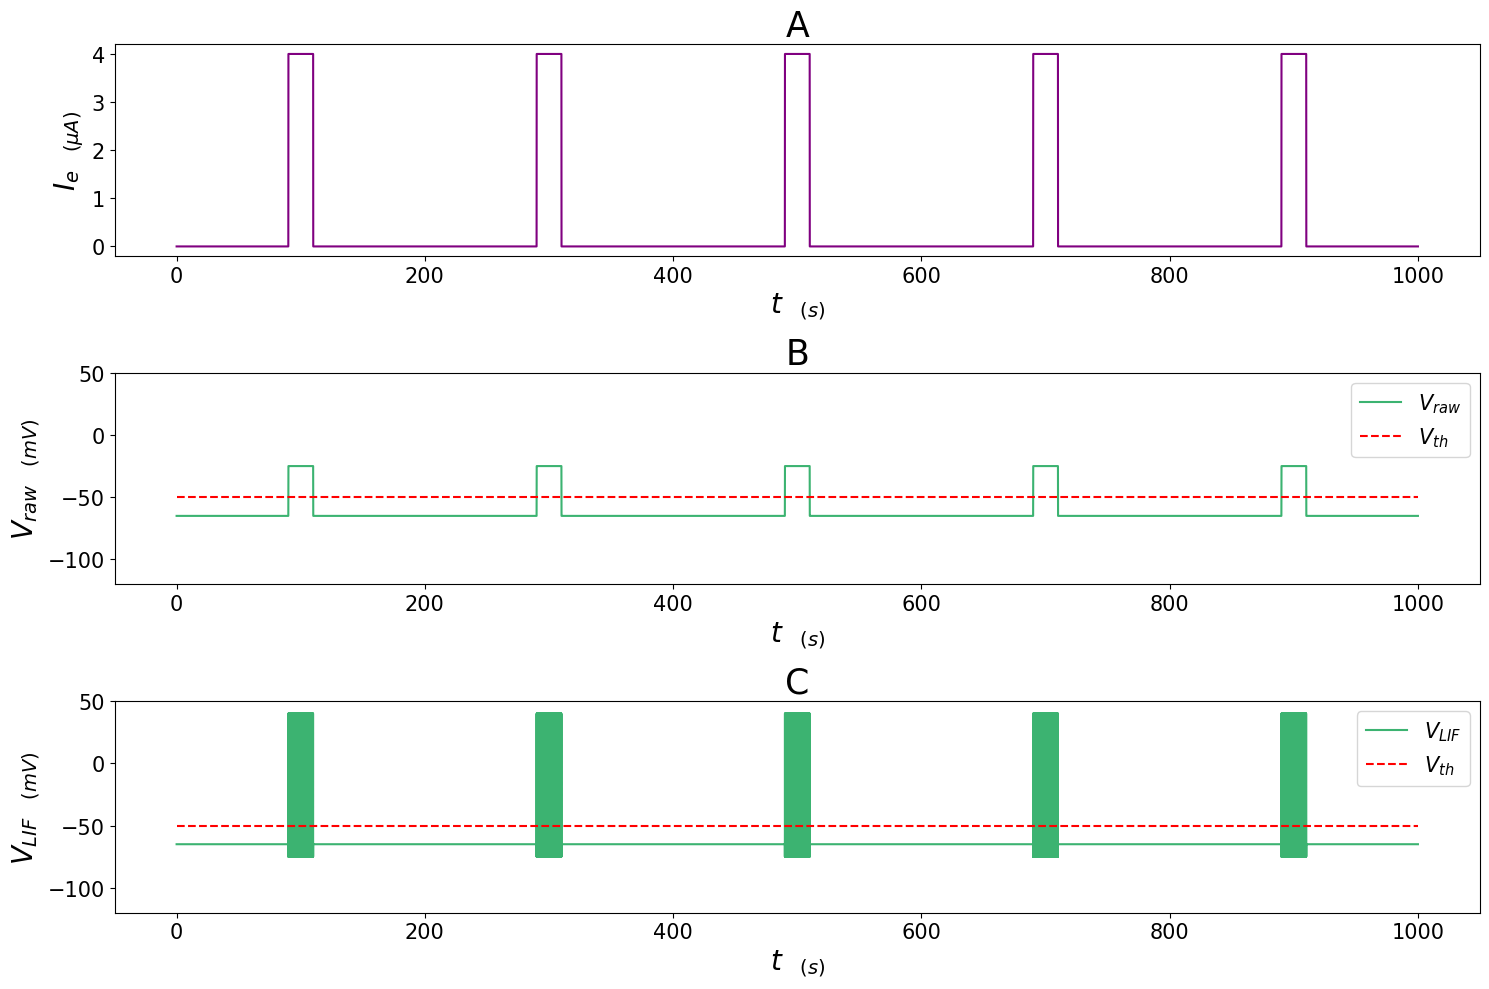

In [67]:
fig, axs = plt.subplots(3, 1, figsize = (15,10))
#fig.suptitle('Horizontally stacked subplots')
axs[0].plot(t, I_e, linewidth = 1.5, c='purple')
axs[0].set_ylabel('$I_{e \quad (\mu A)}$', fontsize = 20)
axs[1].plot(t, V_raw, c ='mediumseagreen', linewidth = 1.5, label = '$V_{raw}$')
axs[1].hlines(-50, 0, len(t)*dt, color='red', linestyle='dashed', label = '$V_{th}$')
axs[1].set_ylim(-120, 50)
axs[1].set_ylabel('$V_{raw \quad (mV)}$', fontsize = 20)
axs[1].legend(loc='upper right', fontsize = 15)
axs[2].plot(t, V, linewidth = 1.5, c = 'mediumseagreen', label = '$V_{LIF}$')
axs[2].hlines(-50, 0, len(t)*dt, color='red', linestyle='dashed', label = '$V_{th}$')
axs[2].set_ylim(-120, 50)
axs[2].set_ylabel('$V_{LIF \quad (mV)}$', fontsize = 20)
axs[2].legend(loc='upper right', fontsize = 15)
titles = ['A', 'B', 'C']
abc=0
for ax in axs.flat:
    ax.set_xlabel('$t_{\quad (s)}$', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_title(titles[abc], fontsize = 25)
    abc = abc+1
plt.tight_layout()

In [68]:
def external_input_to_GRN(V, coupling, dependence):
    ## Spike rate array computation
    V_spikes = np.zeros(int(V.shape[0]/10/10))
    for i in range(int(V.shape[0]/10/10)):
        V_spikes[i] = np.sum(V[i*100:(i+1)*100]==40)*10

    if coupling=='no':
        V_spikes_rescaled = V_spikes-3.5
    else:
        ## Rescaling V_spikes
        maxx = 100
        x = V_spikes-maxx/2
        #y = 3.5*x/np.sqrt(1+x**2)
        y = 3.5*x/(1+np.abs(x))
        V_spikes_rescaled = y

    ## WHAT DEPENDENCE DO WE WANT OUR GENES TO HAVE ON SPIKES/MEMBRANE POTENTIAL? ##
    if dependence == 'activatory': # direct dependence
        g_ext = V_spikes_rescaled
    elif dependence == 'inhibitory': # inverse dependence
        g_ext = -V_spikes_rescaled
    else: # no dependence
        g_ext = np.zeros(len(V_spikes_rescaled))

    return g_ext

def g(u):
    '''
    Sigmoid function 
    '''
    gu = 1/2*(u/np.sqrt(u**2+1)+1)
    return(gu)
    
def traj_GRN_V(V, coupling, prop_list, N, param_set, ic, R = 1, d = 0.05):
    '''
    Inputs: 
    - N = dimension of the network (number of genes)
    - param_set = array containing the information of T and h
                    - param_set[0:N^2] = T = interaction matrix
                    - param_set[N^2:] = h = threshold term (for threshold function)
    - ic = initial conditions
    - R = maximum synthesis rate
    - d = decay rate

    Outputs: 
    - t = time steps 
    - x = array of (N, len(t)) dimensions containing in each row the evolution of the concentration of each gene in the network along the timesteps
    '''
    
    dt = 0.1
    t = np.arange(0, 1000, dt)

    T = param_set[0:N**2].reshape((N, N))
    #h = param_set[N**2:]
    h = np.zeros((N, len(t)))
    for gene in range(N):
        g_ext = external_input_to_GRN(V, coupling, prop_list[gene])
        h[gene, :] = g_ext
    x = np.zeros((N, len(t)))
    x[:, 0] = ic
    for i in range(0, len(t)-1): #loop over timesteps
        u = np.sum(T*x[:,i], axis=1) + h[:,i]*x[:,i]
        x[:, i+1] = dt*(R*g(u) - d*x[:, i]) + x[:, i]
    return (t, x)

In [69]:
def multi_plots_GRN(N, param_set, ic, V, coupling, title):
    list_dep = np.array(['activatory', 'inhibitory', 'non-dependent'])
    list_dep_0 = np.array(['$E^0=+r_{rescaled}$', '$E^0=-r_{rescaled}$', '$E^0=0$'])
    list_dep_1 = np.array(['$E^1=+r_{rescaled}$', '$E^1=-r_{rescaled}$', '$E^1=0$'])
    list_dep_combinations = np.array(list(itertools.product(np.arange(0,3,1), np.arange(0,3,1))))

    t = np.arange(0, 1000, 0.1)
    gene_conc_plots = np.zeros((9, N, len(t)))
    
    fig, axs = plt.subplots(3, 3, figsize = (15,10))
    fig.suptitle(title, fontsize = 23)
    counter = 0
    for g1 in range(3):
        for g2 in range(3):
            time_GRN, conc_GRN = traj_GRN_V(V, coupling, list_dep[list_dep_combinations[counter]], N, param_set, ic, R = 1, d = 0.05)

            gene_conc_plots[counter] = conc_GRN
            
            axs[g1, g2].plot(time_GRN, conc_GRN[0], label = 'x')
            axs[g1, g2].plot(time_GRN, conc_GRN[1], label = 'y')
            axs[2, g2].set_xlabel('$t(s)$', fontsize = 18)
            axs[g1, g2].set_ylim(-2, 22)
            axs[g1, g2].set_title(list_dep_0[list_dep_combinations[counter][0]] + ', $\quad$' + list_dep_1[list_dep_combinations[counter][1]], fontsize = 18)
            axs[0, g2].xaxis.set_tick_params(labelbottom=False)
            axs[1, g2].xaxis.set_tick_params(labelbottom=False)
            axs[2, g2].tick_params(axis='x', labelsize=16)
            #axs[g1, g2].legend()
            counter = counter+1
        axs[g1, 1].yaxis.set_tick_params(labelleft=False)
        axs[g1, 2].yaxis.set_tick_params(labelleft=False)
        axs[g1, 0].tick_params(axis='y', labelsize=16)
        axs[g1, 0].set_ylabel('$g_{conc}$', fontsize = 18)
    fig.tight_layout()
    return(gene_conc_plots)

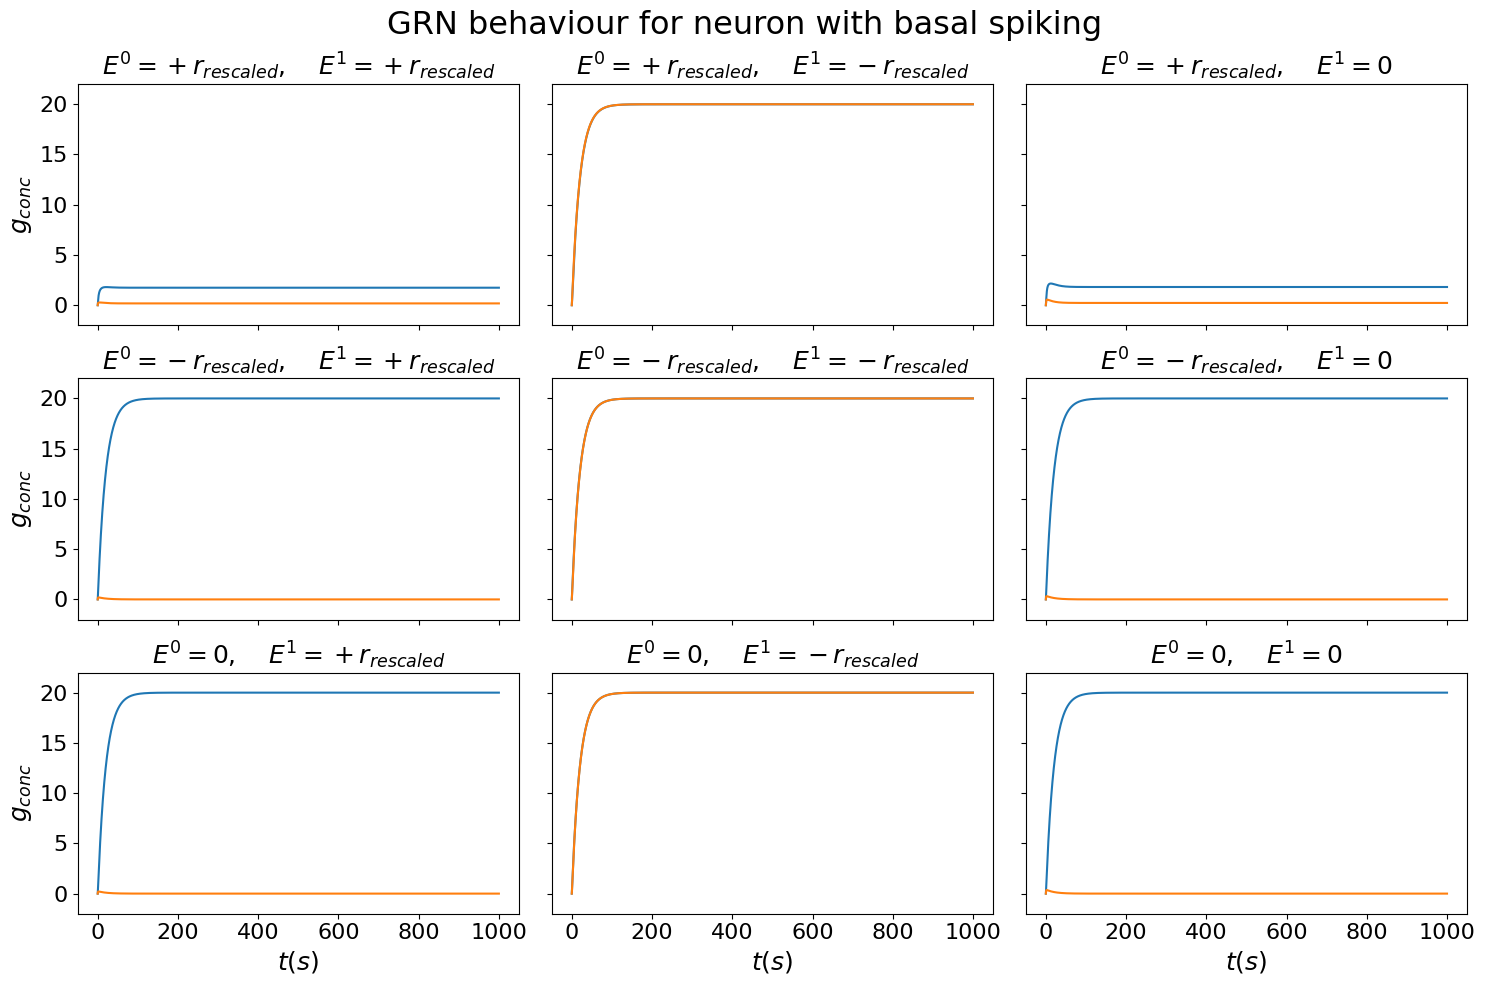

In [70]:
V_non_coup = np.zeros(V.shape[0])
gene_conc_base = multi_plots_GRN(N, param_set, ic, V_non_coup, 'no', 'GRN behaviour for neuron with basal spiking')

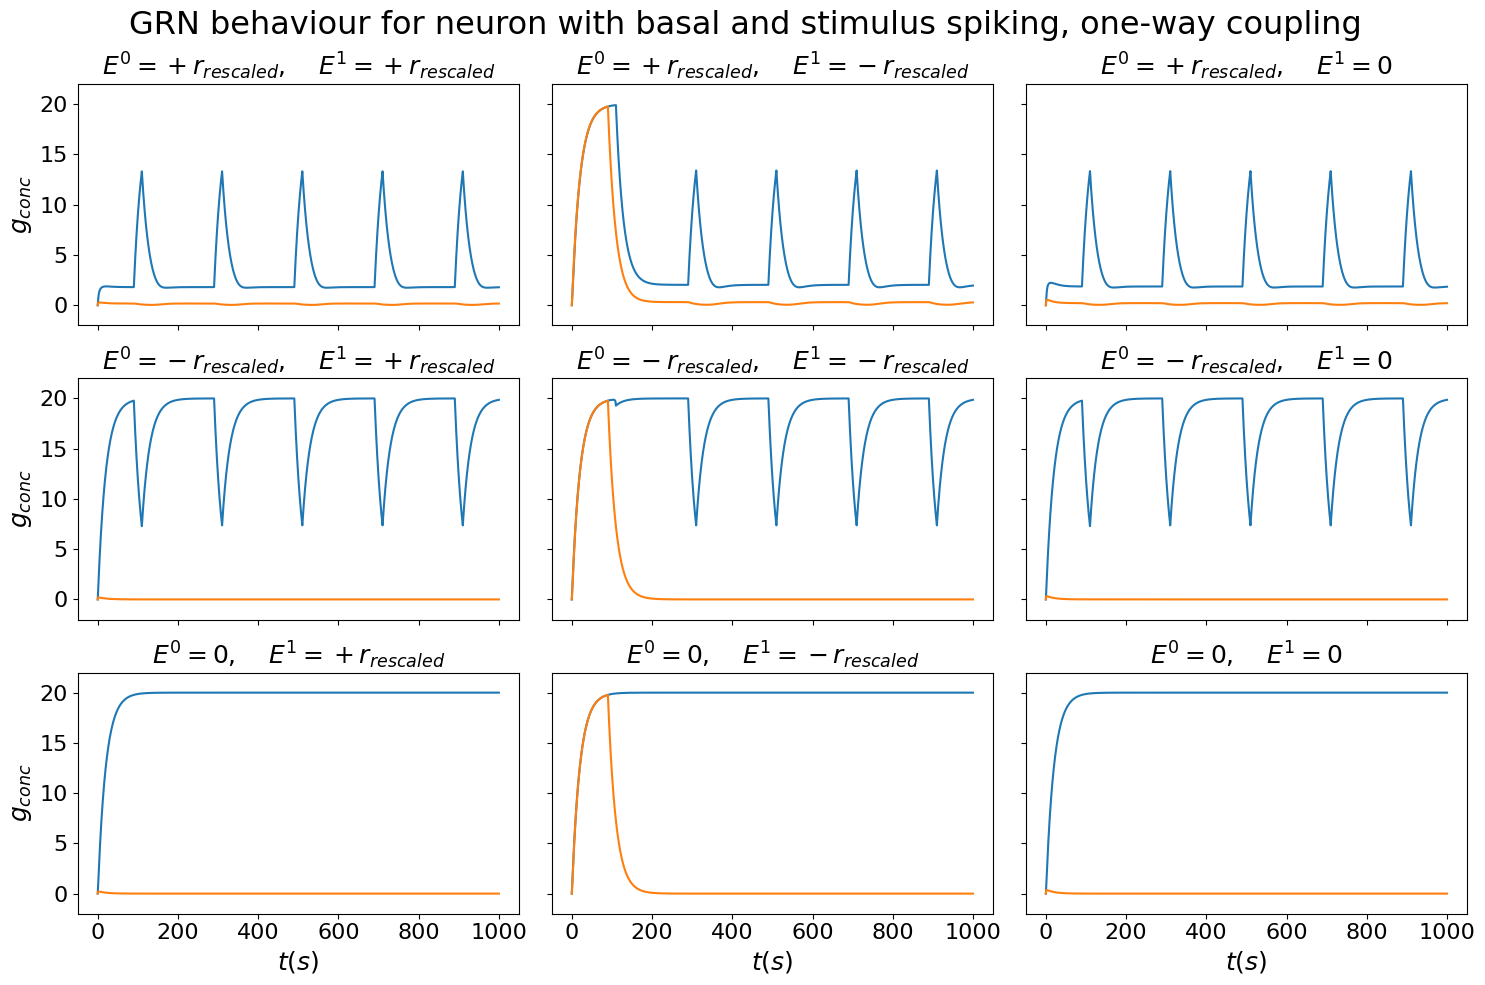

In [71]:
gene_conc_spikes = multi_plots_GRN(N, param_set, ic, V, 'yes', 'GRN behaviour for neuron with basal and stimulus spiking, one-way coupling')

## Habituation

The neuron 'learns' a stimulus and gets used to it, reacting less to it if it ever happens again. (Throwing less spikes $\rightarrow$ transmiting less information).

This can be modeled by raising the potential threshold $V_{th}$ as fast as the gene concentrations separate from their 'basal' trajectory and lowering it back when gene concentrations go towards meeting again their 'basal' trajectory. For the periods in which the distance between the new trajectory and the basal trajectory is constant:
- for long term memory: $V_{th}$ remains constant during such period of time,
- for short term memory: lower $V_{th}$ back as a function of time.

In [72]:
gene_conc_diff = np.abs(gene_conc_spikes - gene_conc_base)

In [73]:
dt = 0.1
t_gene = np.arange(0, 1000, dt)

gene_conc_dev = np.zeros(gene_conc_diff.shape)
for i in range(len(t_gene)-1):
    gene_conc_dev[:, :, i] = 100*(gene_conc_diff[:, :, i+1]-gene_conc_diff[:, :, i])/dt

In [74]:
def coupled_system(N, param_set, ic, prop_list):
    
    ## TIME ##
    tf = 1000
    dt_neur = 0.001
    t_neur = np.arange(0, tf, dt_neur)
    dt_gene = 0.1
    t_gene = np.arange(0, tf, dt_gene)
    
    # initialization of coupling arrays
    V_th = np.zeros((len(t_neur)))
    h = np.zeros((N, len(t_gene)))
    
    ## PARAMETERS neuron##
    tau = 0.01 # s (seconds)
    V_rest = -65 # mV
    R_m = 10 # MOhm
    t_refract = 0.008 # s (seconds)
    E_L = -65
    V_th_theoretical = -50 # mV
    V_th = np.ones((len(t_neur)))*V_th_theoretical
    
    ## VECTORS neuron##
    ii = [1]*120000 + [4]*20000 + [1]*60000 
    #ii = list(np.random.uniform(0, 2.2, 90000)) + list(np.random.uniform(2, 3, 20000)) + list(np.random.uniform(0, 2.2, 90000))
    #ii = list(np.random.normal(1.7, 1, 90000)) + list(np.random.normal(2.5, 1, 20000)) + list(np.random.normal(1.7, 1, 90000))
    I_e = ii*5 # input current
    I_e = ii*5 #np.random.uniform(-5, 10, len(t)) # input current
    #ii = [1]*31667 + [4]*20000 + [1]*31667
    #I_e = ii*12
    #I_e = I_e[0:-8]
    
    V = np.zeros(len(t_neur)) # we create a vector of zeros for the storage of membrane potentials along time
    V[0] = V_rest # seting the initial value for membrane potential
    V_non_coup = np.zeros(V.shape[0])
    
    ## PARAMETERS genes ##
    R = 1
    d = 0.05
    T = param_set[0:N**2].reshape((N, N))
    
    ## VECTORS genes ##
    gene_conc_base = np.zeros((N, len(t_gene)))
    gene_conc_spike = np.zeros((N, len(t_gene)))
    gene_conc_base[:, 0] = ic
    gene_conc_spike[:, 0] = ic
    
    gene_conc_diff = np.zeros((N, len(t_gene)))
    gene_conc_diff[:, 0] = [0, 0]
    gene_conc_dev = np.zeros((N, len(t_gene)-1))
    spike = 0
    ## ALGORITHM ##
    for j in range(len(t_gene)):
        if j==0:
            k = 1
        else:
            k = 0
        while k<100:
            i = j*100 + k
            V[i] = 1/tau*(E_L - V[i-1] + R_m*I_e[i])*dt_neur + V[i-1] # fill V[i] with the value for membrane potential yield by the LIF model equation
            if V[i]>V_th[i] and i<(len(t_neur)-3): # if such a value (V[i]) beats the threshold value V_th and we have enough space for a spike in our vector
                                           # we consider that the neuron spikes and, therefore, we glue an action potential
                spike = spike + 1 # add 1 to the spike count
                
                # DEPOLARIZATION
                V[i] = 40 # change the V[i] value to the depolarizaed value that characterizes the spike
                i = i+1 # increment our time index
                
                # HYPERPOLARIZATION
                V[i] = V_rest - 10 # set the next V[i] to the hyperpolarized value that characterizes spikes after depolarization
                i = i+1 # increment our time index
                
                # REFRACTORINESS
                new_i = i + int(t_refract/dt_neur) # select our final index for refractoriness (the neuron will be in its refractory period from i to new_i)
                V[i:new_i] = V_rest # set V_rest as the value of the neuron's membrane potential for the whole refractory period
                i = new_i - 1 # update our time index to the time in which V was last filled
        
            i = i+1 # increase the time index by one and turn back to check while condition
            k = -j*100 + i
        
        h_base = np.zeros(N)
        h_spike = np.zeros(N)
        for gene in range(N):
            g_ext_base = external_input_to_GRN(V_non_coup[j*100:(j+1)*100], 'no', prop_list[gene]) # V of the last 100 neuronal timesteps
            h_base[gene] = g_ext_base
        
            g_ext_spike = external_input_to_GRN(V[j*100:(j+1)*100], 'yes', prop_list[gene]) # V of the last 100 neuronal timesteps
            h_spike[gene] = g_ext_spike
            
        if j<len(t_gene)-1:
            u = np.sum(T*gene_conc_base[:,j], axis=1) + h_base*gene_conc_base[:,j]
            gene_conc_base[:, j+1] = dt_gene*(R*g(u) - d*gene_conc_base[:, j]) + gene_conc_base[:, j]
        
            u = np.sum(T*gene_conc_spike[:,j], axis=1) + h_spike*gene_conc_spike[:,j]
            gene_conc_spike[:, j+1] = dt_gene*(R*g(u) - d*gene_conc_spike[:, j]) + gene_conc_spike[:, j]
        
            gene_conc_diff[:, j+1] = np.abs(gene_conc_spike[:, j+1] - gene_conc_base[:, j+1])
        
            gene_conc_dev[:, j] = (gene_conc_diff[:, j+1]-gene_conc_diff[:, j])/dt_gene
        
            if (10000 + 100*(j+1)) < len(t_neur):
                V_th[10000 + 100*j: 10000 + 100*(j+1)] = V_th[10000 + 100*j - 2] + 0.1*np.sum(gene_conc_dev[:, j])

    return(V, V_th, gene_conc_spike, gene_conc_base, gene_conc_dev, spike)

In [75]:
def multi_plots_GRN(N, param_set, ic, which_conc, what, title):
    list_dep = np.array(['activatory', 'inhibitory', 'non-dependent'])
    list_dep_0 = np.array(['$E^0=+r_{rescaled}$', '$E^0=-r_{rescaled}$', '$E^0=0$'])
    list_dep_1 = np.array(['$E^1=+r_{rescaled}$', '$E^1=-r_{rescaled}$', '$E^1=0$'])
    list_dep_combinations = np.array(list(itertools.product(np.arange(0,3,1), np.arange(0,3,1))))

    t_gene = np.arange(0, 1000, 0.1)
    t_neur = np.arange(0, 1000, 0.001)
    fig, axs = plt.subplots(3, 3, figsize = (15,10))
    fig.suptitle(title, fontsize = 23)
    counter = 0
    V_all = np.zeros((9, 2, len(t_neur)))
    V_th_all = np.zeros((9, 2, len(t_neur)))
    genes_all = np.zeros((9, 2, len(t_gene)))
    for g1 in range(3):
        for g2 in range(3):
            #time_GRN, conc_GRN = traj_GRN_V(V, coupling, list_dep[list_dep_combinations[counter]], N, param_set, ic, R = 1, d = 0.05)
            V, V_th, gene_conc_spike, gene_conc_base,  gene_conc_dev, spike = coupled_system(N, param_set, ic, list_dep[list_dep_combinations[counter]])
            V_all[counter] = V
            V_th_all[counter] = V_th
            if which_conc == 'base':
                conc_GRN = gene_conc_base
                genes_all[counter] = gene_conc_base
            else: 
                conc_GRN = gene_conc_spike
                genes_all[counter] = gene_conc_spike
            #gene_conc_plots[counter] = conc_GRN
            if what =='V':
                axs[g1, g2].plot(t_neur, V, label = 'V', c='mediumseagreen')
                axs[g1, g2].plot(t_neur, V_th, label = 'V_th', c='red')
                axs[2, g2].set_xlabel('$t$', fontsize = 18)
                axs[g1, 0].set_ylabel('$V$', fontsize = 18)
                #axs[g1, g2].set_ylim(-2, 22)
                axs[g1, g2].set_title(spike, fontsize = 18)
                #axs[g1, g2].set_title(list_dep_0[list_dep_combinations[counter][0]] + ', $\quad$' + list_dep_1[list_dep_combinations[counter][1]], fontsize = 18)
                #axs[g1, g2].legend()
                counter = counter+1
            else:
                axs[g1, g2].plot(t_gene, conc_GRN[0], label = 'x')
                axs[g1, g2].plot(t_gene, conc_GRN[1], label = 'y')
                axs[2, g2].set_xlabel('$t$', fontsize = 18)
                axs[g1, 0].set_ylabel('$g_{conc}$', fontsize = 18)
                axs[g1, g2].set_ylim(-2, 22)
                axs[g1, g2].set_title(list_dep_0[list_dep_combinations[counter][0]] + ', $\quad$' + list_dep_1[list_dep_combinations[counter][1]], fontsize = 18)
                #axs[g1, g2].legend()
                counter = counter+1
            axs[0, g2].xaxis.set_tick_params(labelbottom=False)
            axs[1, g2].xaxis.set_tick_params(labelbottom=False)
            axs[2, g2].tick_params(axis='x', labelsize=16)
        axs[g1, 1].yaxis.set_tick_params(labelleft=False)
        axs[g1, 2].yaxis.set_tick_params(labelleft=False)
        axs[g1, 0].tick_params(axis='y', labelsize=16)
        
    fig.tight_layout()
    return(V_all, V_th_all, genes_all)

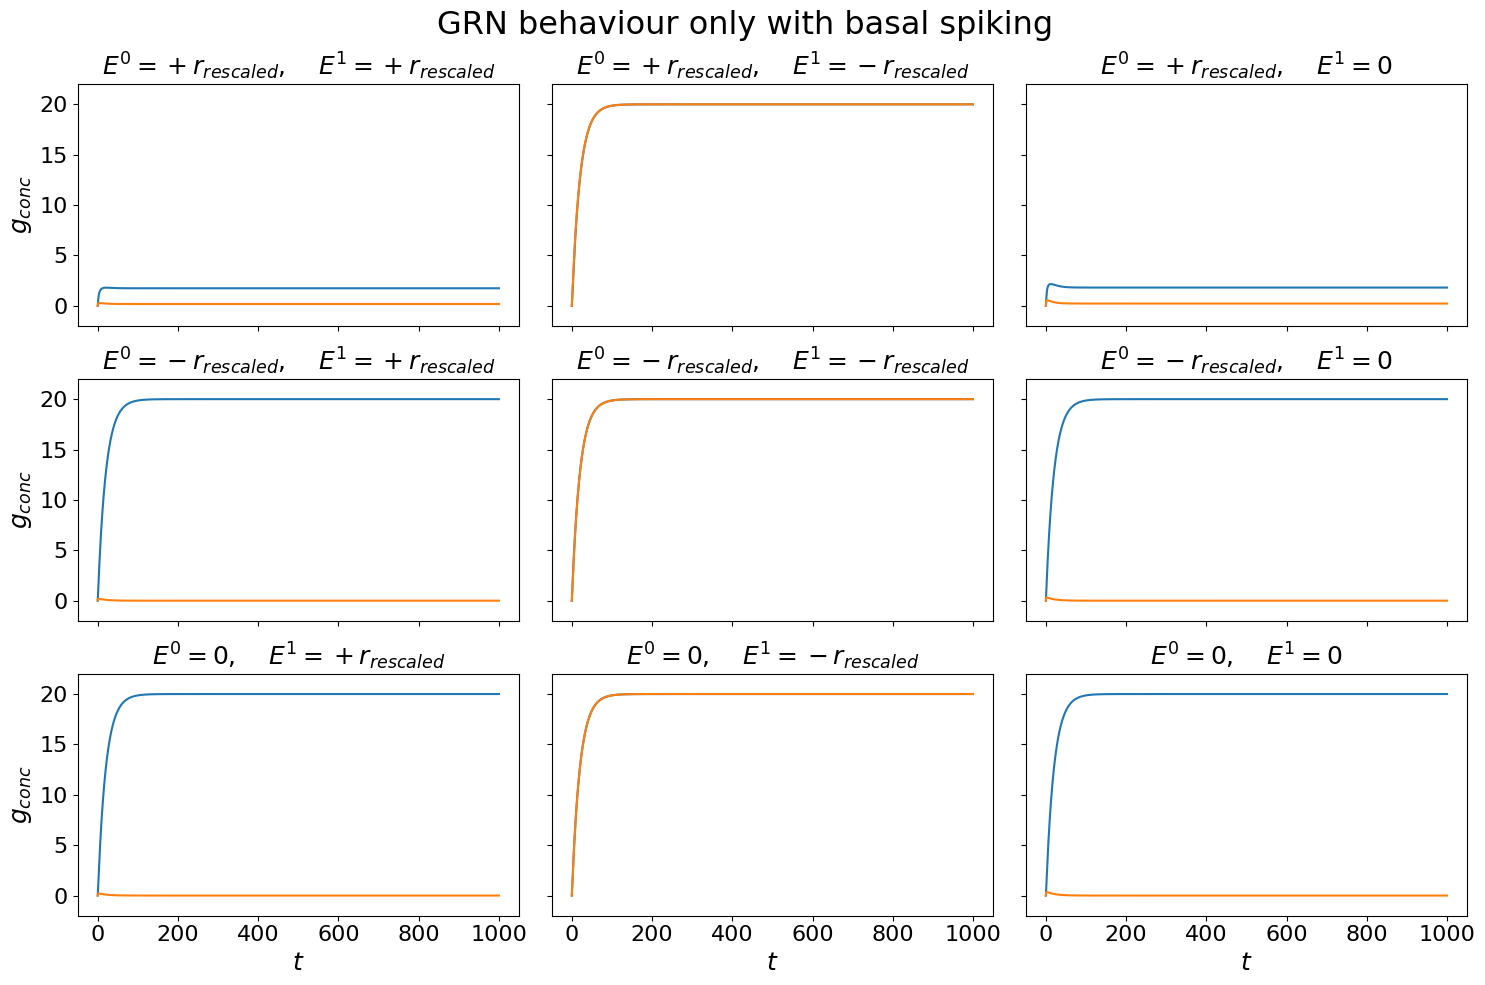

In [76]:
V_all_base, V_th_all_base, genes_all_base = multi_plots_GRN(N, param_set, ic, 'base', 'gene', 'GRN behaviour only with basal spiking')

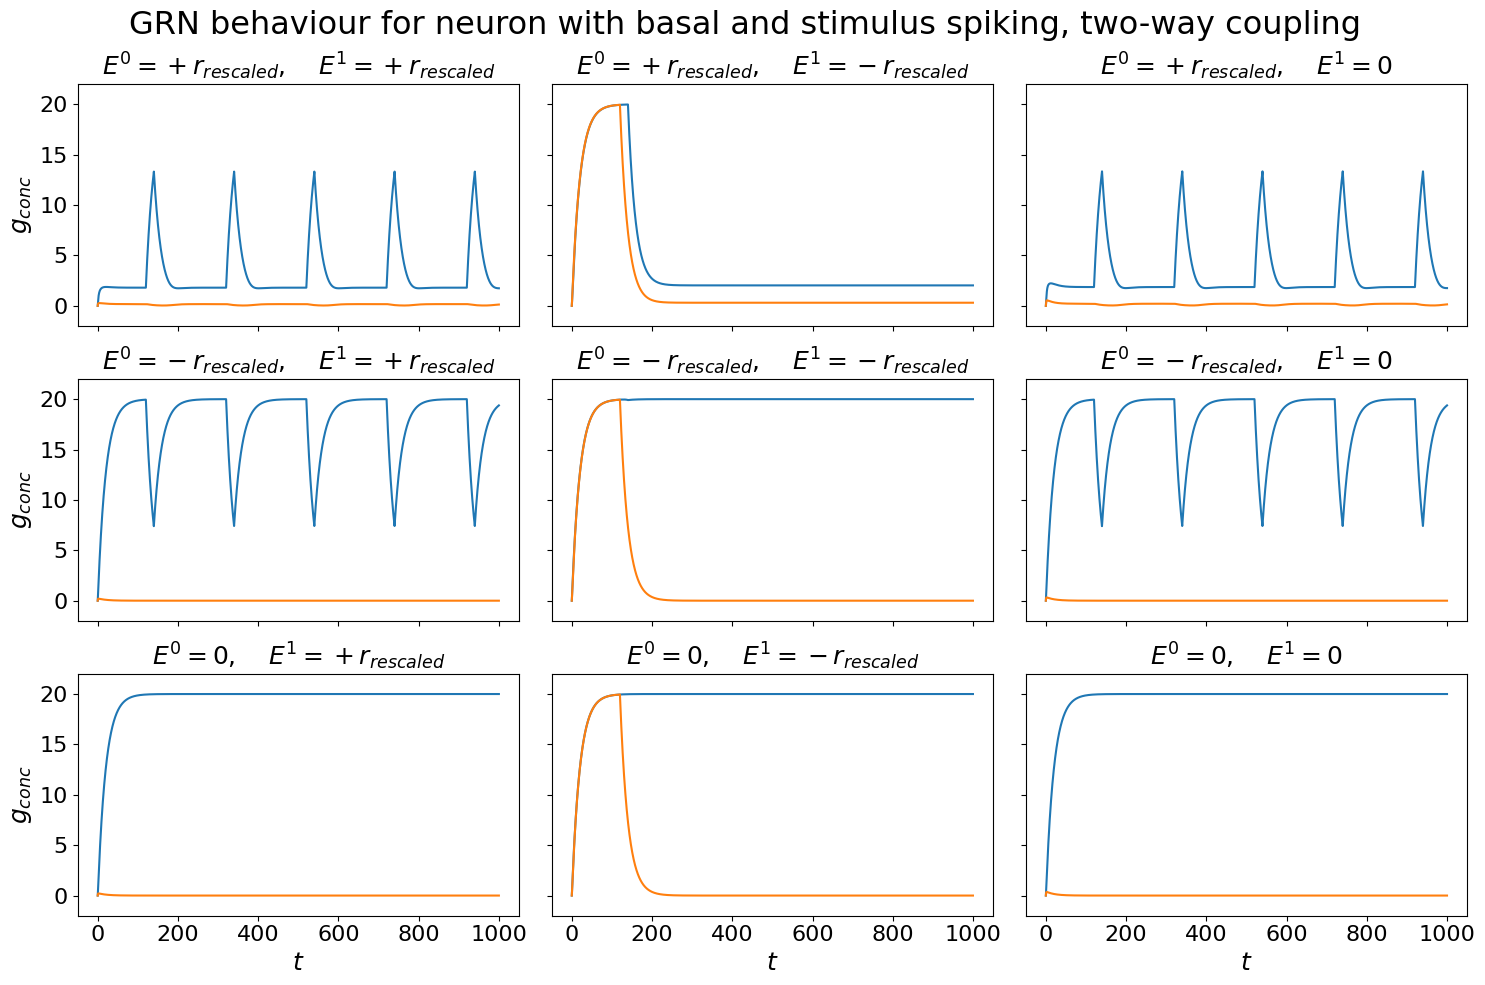

In [77]:
V_all_spike, V_th_all_spike, genes_all_spike = multi_plots_GRN(N, param_set, ic, 'spike', 'gene', 'GRN behaviour for neuron with basal and stimulus spiking, two-way coupling')

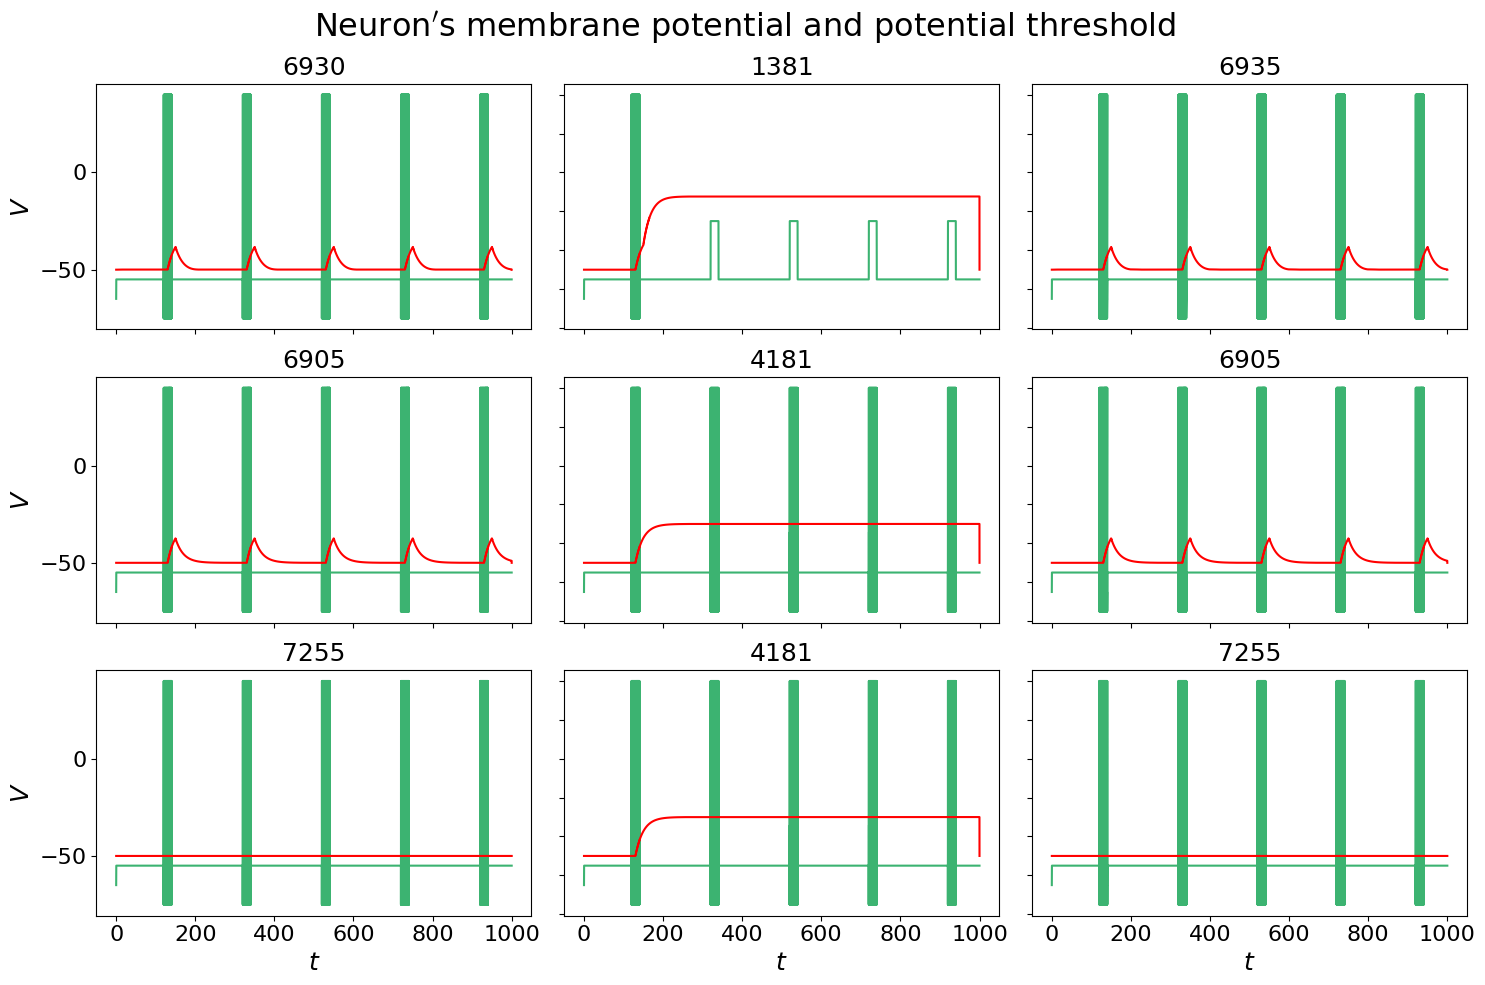

In [78]:
V_all, V_th_all, genes_all = multi_plots_GRN(N, param_set, ic, 'spike', 'V', 'Neuron$\'$s membrane potential and potential threshold')

### IDEAS
- Make the potential threshold lower down as time goes by
- Couple on $E_L$


In [79]:
dt = 0.1
time_GRN = np.arange(0, 1000, dt)
rrr = 1

In [80]:
tr_1 = gene_conc_base[rrr,:,:]
tr_2 = gene_conc_spikes[rrr,:,:]
tr_3 = genes_all_spike[rrr,:,:]

In [81]:
V_base = [-65]*1000000
V_th_base = [-55]*1000000

V_spikes = V_all[8,:,:][0]
V_th_spikes = V_th_all[8,:,:][0]

V_ = V_all[rrr,:,:][0]
V_th_ = V_th_all[rrr,:,:][0]

In [82]:
V_[0]

-65.0

In [83]:
import seaborn as sns

In [84]:
t_neur = np.arange(0, 1000, 0.001)

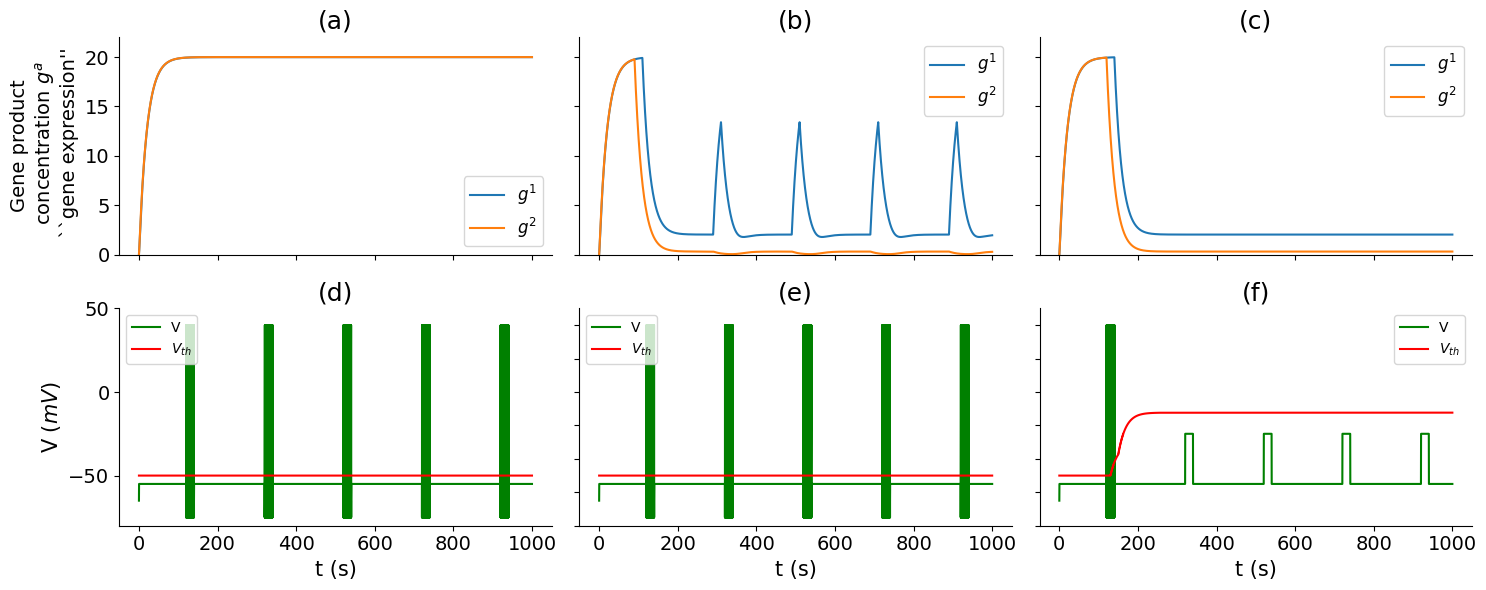

In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties


# Create a GridSpec layout
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 6, height_ratios=[2, 2])

# Define font properties for the legend
font_properties = FontProperties()
font_properties.set_size(16)  # Set the desired font size


# Subplot 1 (Top-left)
ax1 = fig.add_subplot(gs[0, 0:2])
sns.lineplot(x=time_GRN, y=tr_1[0], ax=ax1, label='$g^1$')
sns.lineplot(x=time_GRN, y=tr_1[1], ax=ax1, label='$g^2$')
sns.despine(ax=ax1)
ax1.set_title('(a)', fontsize = 18)
#ax1.set_xlabel('t (s)', fontsize = 15)
ax1.set_ylabel("Gene product\n concentration $g^a$\n ``gene expression''", fontsize = 14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.xaxis.set_tick_params(labelleft=False)
ax1.set_ylim(0, 22)
ax1.legend(fontsize=12)

# Subplot 2 (Top-middle)
ax2 = fig.add_subplot(gs[0, 2:4])
sns.lineplot(x=time_GRN, y=tr_2[0], ax=ax2, label='$g^1$')
sns.lineplot(x=time_GRN, y=tr_2[1], ax=ax2, label='$g^2$')
sns.despine(ax=ax2)
ax2.set_title('(b)', fontsize = 18)
#ax2.set_xlabel('t (s)', fontsize = 15)
ax2.tick_params(axis='x', labelsize=14)
ax2.yaxis.set_tick_params(labelleft=False)
ax2.xaxis.set_tick_params(labelleft=False)
ax2.set_ylim(0, 22)
ax2.legend(fontsize=12)

# Subplot 3 (Top-right)
ax3 = fig.add_subplot(gs[0, 4:])
sns.lineplot(x=time_GRN, y=tr_3[0], ax=ax3,  label='$g^1$')
sns.lineplot(x=time_GRN, y=tr_3[1], ax=ax3,  label='$g^2$')
sns.despine(ax=ax3)
ax3.set_title('(c)', fontsize = 18)
#ax3.set_xlabel('t (s)', fontsize = 15)
ax3.tick_params(axis='x', labelsize=14)
ax3.yaxis.set_tick_params(labelleft=False)
ax3.xaxis.set_tick_params(labelleft=False)
ax3.set_ylim(0, 22)
ax3.legend(fontsize=12)

# Subplot 4 (Bottom, spanning entire width)
ax4 = fig.add_subplot(gs[1, 0:2])  # This spans all columns
sns.lineplot(x=t_neur[:-100], y=V_spikes[:-100], ax=ax4, label='V', c = 'green')
sns.lineplot(x=t_neur[:-100], y=V_th_spikes[:-100], ax=ax4, label='$V_{th}$', c = 'red')
sns.despine(ax=ax4)
ax4.set_title('(d)', fontsize = 18)
ax4.set_xlabel('t (s)', fontsize = 15)
ax4.set_ylabel('V $(mV)$', fontsize = 15)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)
ax4.set_ylim(-80, 50)
ax4.legend(loc = 'upper left')

# Subplot 4 (Bottom, spanning entire width)
ax5 = fig.add_subplot(gs[1, 2:4])  # This spans all columns
sns.lineplot(x=t_neur[:-100], y=V_spikes[:-100], ax=ax5, label='V', c = 'green')
sns.lineplot(x=t_neur[:-100], y=V_th_spikes[:-100], ax=ax5, label='$V_{th}$', c = 'red')
sns.despine(ax=ax5)
ax5.set_title('(e)', fontsize = 18)
ax5.set_xlabel('t (s)', fontsize = 15)
ax5.tick_params(axis='x', labelsize=14)
ax5.set_ylim(-80, 50)
ax5.yaxis.set_tick_params(labelleft=False)
ax5.legend(loc = 'upper left')

# Subplot 6 (Bottom, spanning entire width)
ax6 = fig.add_subplot(gs[1, 4:])  # This spans all columns
sns.lineplot(x=t_neur[:-100], y=V_[:-100], ax=ax6, label='V', c = 'green')
sns.lineplot(x=t_neur[:-100], y=V_th_[:-100], ax=ax6, label='$V_{th}$', c = 'red')
sns.despine(ax=ax6)
ax6.set_title('(f)', fontsize = 18)
ax6.set_xlabel('t (s)', fontsize = 15)
ax6.tick_params(axis='x', labelsize=14)
ax6.set_ylim(-80, 50)
ax6.yaxis.set_tick_params(labelleft=False)
ax6.legend(loc = 'upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.legend()
plt.show()